In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 

In [4]:
boston = pd.read_csv("Boston.csv")
boston = boston.iloc[:,1:15]
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


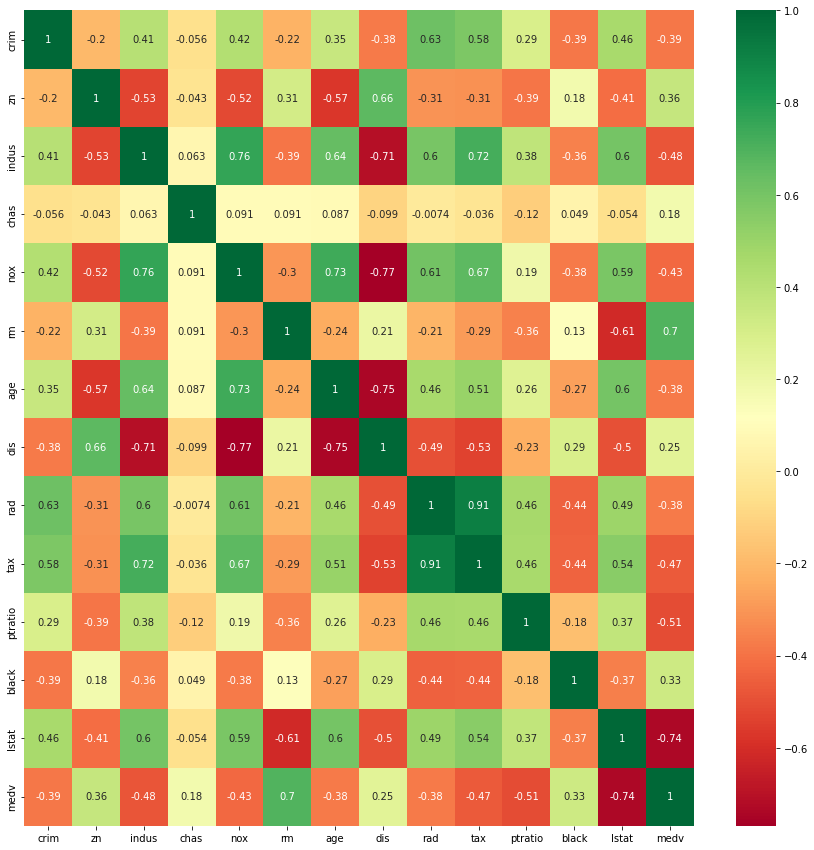

In [5]:
corrmat = boston.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(15,15))
g=sns.heatmap(boston[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [51]:
features = [boston.lstat, boston.rm, boston.ptratio, boston.indus, boston.tax]
features = pd.DataFrame(features)
features = features.transpose()

## Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features. (from sklearn.linear_model import LinearRegression) 

In [98]:
X = features.iloc[:,0:3]
Y = boston.medv

X = np.array(X)
Y = np.array(Y)

In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2) #Splitting into Test and Train datasets

In [83]:
reg = LinearRegression().fit(X_train, Y_train) #Creating Multiple Linear Regression Model

In [84]:
Y_pred_test = reg.predict(X_test) #Prediciting medv on Test Dataset

## Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.

In [96]:
def findRSquare(y_true, y_pred):
    y_mean = np.mean(y_true)
    sse = np.mean(np.subtract(y_true, y_pred)**2)
    sst = np.mean(np.subtract(y_true, y_mean)**2)
    
    return 1 - np.divide(sse,sst)

def findRMSE(y_true, y_pred):
    return np.sqrt(np.mean(np.abs((np.subtract(y_true,y_pred))**2)))

In [97]:
r_square = findRSquare(Y_test, Y_pred_test)
rmse = findRMSE(Y_test, Y_pred_test)
mse = rmse**2

print("R-Square = ", r_square)
print("Mean Square Error = ", mse)
print("Root Mean Square Error = ", rmse)

R-Square =  0.5527287865401849
Mean Square Error =  26.356319068695754
Root Mean Square Error =  5.133840576867941


In [85]:
from sklearn.metrics import r2_score, mean_squared_error

r_square = r2_score(Y_pred_test,Y_test)
mse = mean_squared_error(Y_pred_test,Y_test)
rmse = mse**0.5

print("R-Square = ", r_square)
print("Mean Square Error = ", mse)
print("Root Mean Square Error = ", rmse)

R-Square =  0.5910809639811668
Mean Square Error =  26.356319068695747
Root Mean Square Error =  5.13384057686794
